In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

# Exploratory Data Analyses

In [157]:
df_input = pd.read_csv("https://raw.githubusercontent.com/LeiteJu/TCC/main/data/csv/input.csv")
# df_target = pd.read_csv("https://raw.githubusercontent.com/LeiteJu/TCC/main/data/csv/target.csv")
df_target = pd.read_csv("https://raw.githubusercontent.com/LeiteJu/TCC/main/data/csv/target_ac.csv")

## EDA - INPUT Features

In [158]:
df_input.shape

(9396, 17)

In [159]:
df_input.head()

,estados,data,pib_pc,pib_pmc,pib_pcpt,populacao,pib_cc,ipca,incc,igp,selic,idh_long,idh_renda,idh_educacao,nfsp,estoque,desemprego
0,AC,199101,3.281564e+06,14.663360,0.708721,417102.0,1.869529e+05,6.62,4.7,19.93,2.375185,0.645,0.647,0.176,11.17,4.782147e+06,9.216314
1,AL,199101,1.419695e+07,74.802077,0.510378,2512658.0,1.045711e+06,6.62,4.7,19.93,2.375185,0.552,0.574,0.174,11.17,4.782147e+06,8.980849
2,AM,199101,1.481369e+07,192.541724,0.634686,2102766.0,1.727997e+06,6.62,4.7,19.93,2.375185,0.668,0.527,0.254,11.17,4.782147e+06,11.555730
3,AP,199101,2.553397e+06,17.042118,0.793464,289035.0,7.302087e+04,6.62,4.7,19.93,2.375185,0.645,0.620,0.204,11.17,4.782147e+06,5.922940
4,BA,199101,6.417557e+07,475.734256,0.488841,11867336.0,6.191147e+06,6.62,4.7,19.93,2.375185,0.582,0.605,0.182,11.17,4.782147e+06,8.211435


In [160]:
df_input.tail()

,estados,data,pib_pc,pib_pmc,pib_pcpt,populacao,pib_cc,ipca,incc,igp,selic,idh_long,idh_renda,idh_educacao,nfsp,estoque,desemprego
9391,RS,201912,2.191460e+08,3.851358e+08,1.751534,4614268.0,9.031052e+06,5.9,0.17,1.74,0.02462,0.78,0.70,0.77,0.49,7.827728e+06,11.1
9392,SC,201912,1.397300e+08,2.455670e+08,1.778611,1515142.0,6.353526e+06,5.9,0.17,1.74,0.02462,0.87,0.71,0.78,0.49,7.827728e+06,11.1
9393,SE,201912,2.079654e+07,3.654866e+07,0.822464,32126058.0,8.019597e+05,5.9,0.17,1.74,0.02462,0.85,0.78,0.83,0.49,7.827728e+06,11.1
9394,SP,201912,1.030307e+09,1.810701e+09,2.039769,946604.0,3.482197e+07,5.9,0.17,1.74,0.02462,0.80,0.80,0.64,0.49,7.827728e+06,11.1
9395,TO,201912,1.853657e+07,3.257689e+07,1.071383,437495.0,8.160933e+05,5.9,0.17,1.74,0.02462,0.81,0.68,0.73,0.49,7.827728e+06,11.1


In [161]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   estados       9396 non-null   object 
 1   data          9396 non-null   int64  
 2   pib_pc        9396 non-null   float64
 3   pib_pmc       9396 non-null   float64
 4   pib_pcpt      9396 non-null   float64
 5   populacao     9396 non-null   float64
 6   pib_cc        9396 non-null   float64
 7   ipca          9396 non-null   float64
 8   incc          9396 non-null   float64
 9   igp           9396 non-null   float64
 10  selic         9396 non-null   float64
 11  idh_long      9396 non-null   float64
 12  idh_renda     9396 non-null   float64
 13  idh_educacao  9396 non-null   float64
 14  nfsp          9396 non-null   float64
 15  estoque       9396 non-null   float64
 16  desemprego    9396 non-null   float64
dtypes: float64(15), int64(1), object(1)
memory usage: 1.2+ MB


In [162]:
#df_input["desemprego"] = df_input["desemprego"].apply(lambda x: -1 if x == "Brasil" else x).astype(float)

## 1. Structure Investigation

In [163]:
df_input.dtypes.value_counts()

float64    15
int64       1
object      1
dtype: int64

### 1.1 Structure of numerical features


In [164]:
df_input.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
data,9396.0,2.005065e+05,8.367117e+02,1.991010e+05,1.998038e+05,2.005065e+05,2.012092e+05,2.019120e+05
pib_pc,9396.0,9.680973e+07,1.689762e+08,2.291290e+06,1.751462e+07,4.186368e+07,9.567711e+07,1.050063e+09
pib_pmc,9396.0,8.142335e+07,1.840250e+08,1.187132e+01,6.214983e+06,2.462307e+07,7.683858e+07,1.810701e+09
pib_pcpt,9396.0,1.105420e+00,6.663839e-01,3.445102e-01,6.751962e-01,9.236769e-01,1.340956e+00,3.999760e+00
populacao,9396.0,5.477219e+06,6.511045e+06,2.175830e+05,1.639035e+06,2.649747e+06,7.127956e+06,3.212606e+07
pib_cc,9396.0,5.818546e+06,9.272548e+06,2.102823e+03,1.197217e+06,2.566448e+06,6.259212e+06,5.822316e+07
ipca,9396.0,1.412420e+02,3.135630e+02,4.400000e-01,3.627500e+00,1.541000e+01,9.847750e+01,2.477150e+03
incc,9396.0,8.764569e+00,1.280732e+01,-5.000000e-01,5.800000e-01,2.355000e+00,1.286250e+01,7.841000e+01
igp,9396.0,3.878477e+00,9.252582e+00,-1.240000e+00,2.300000e-01,6.800000e-01,1.462500e+00,4.658000e+01
selic,9396.0,2.360039e-01,4.590336e-01,2.462000e-02,4.282221e-02,6.161469e-02,1.034916e-01,3.384407e+00


### 1.2 Structure of Non-Numeric features

In [165]:
df_input.describe(exclude='number').T

,count,unique,top,freq
estados,9396,27,ES,348


In [166]:
print(df_input["data"].min())
print(df_input["data"].max())

199101
201912


## 2. Quality Investigation

### 2.1. Unique values

<AxesSubplot:title={'center':'Unique Values per feature'}>

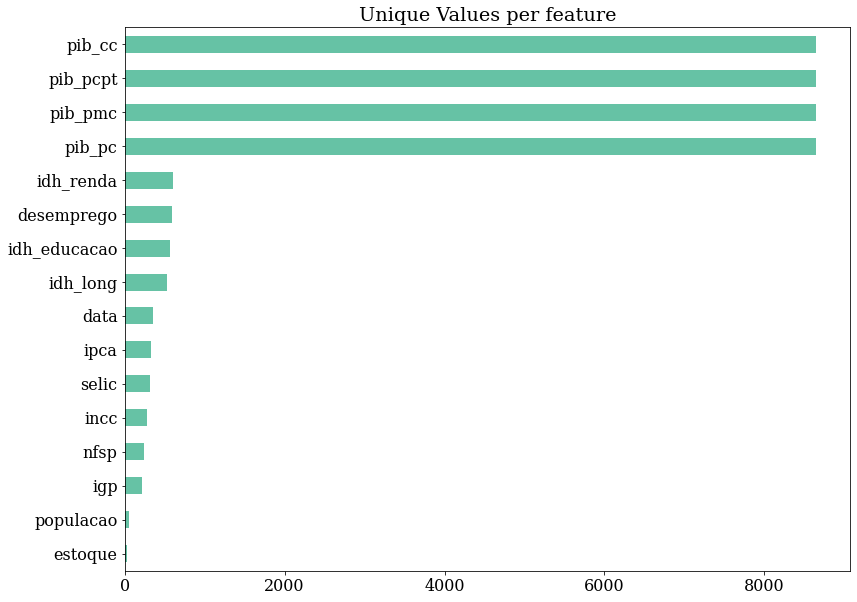

In [167]:
unique_values = df_input.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([0]), [Text(0, 0, 'estados')])

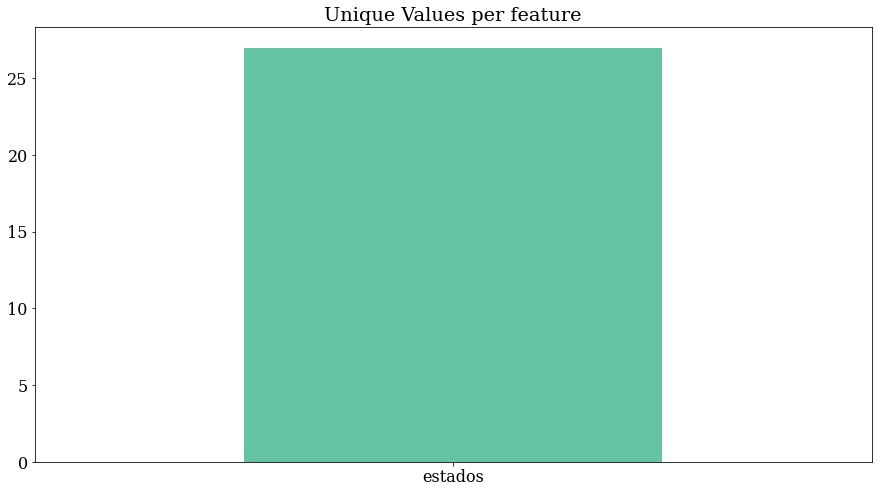

In [168]:
unique_values = df_input.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

### 2.2. Missing values

In [169]:
print("There are", df_input.isna().any().sum(), "variables with missing values from a total of", df_input.shape[1])

There are 0 variables with missing values from a total of 17


In [170]:
(df_input.isna().sum()/df_input.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
desemprego,0.000000
ipca,0.000000
data,0.000000
pib_pc,0.000000
pib_pmc,0.000000
pib_pcpt,0.000000
populacao,0.000000
pib_cc,0.000000
incc,0.000000
estoque,0.000000


<BarContainer object of 17 artists>

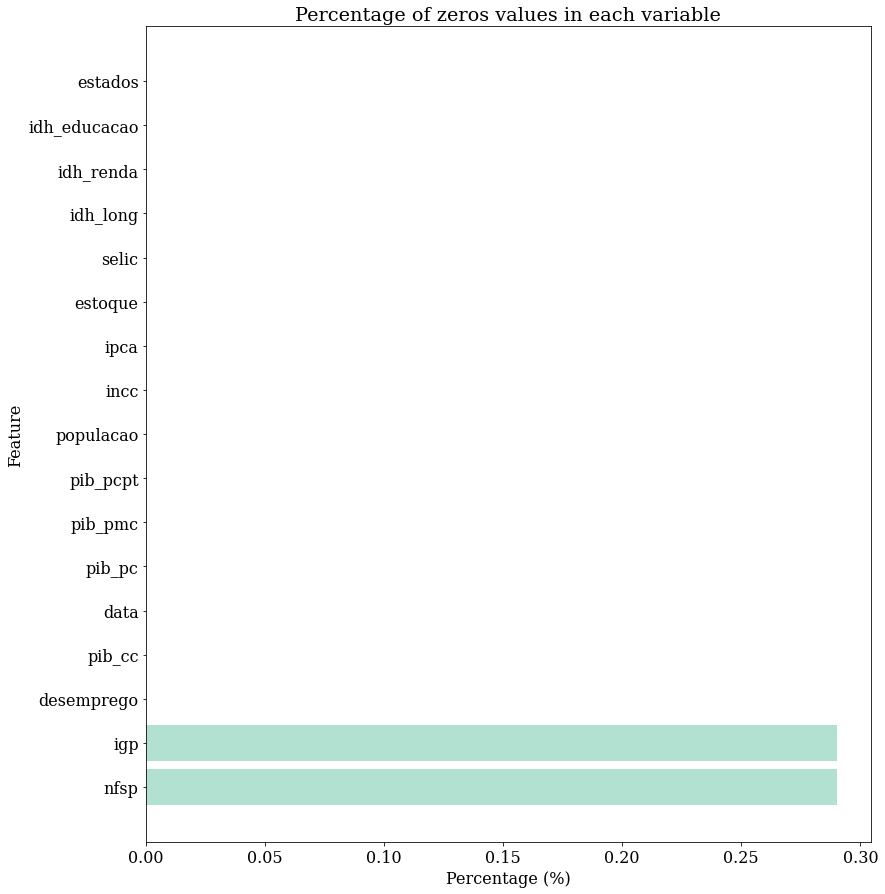

In [171]:
zeros_perc = (df_input == 0).sum(axis=0) / df_input.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

### 2.4. Duplicates

In [172]:
n_duplicates = df_input.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [173]:
n_duplicates = (
    df_input.drop(["data", "estados"], axis=1)
    .duplicated()
    .sum()
)
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


## 3. Content Investigation

### 3.1. Feature distribution

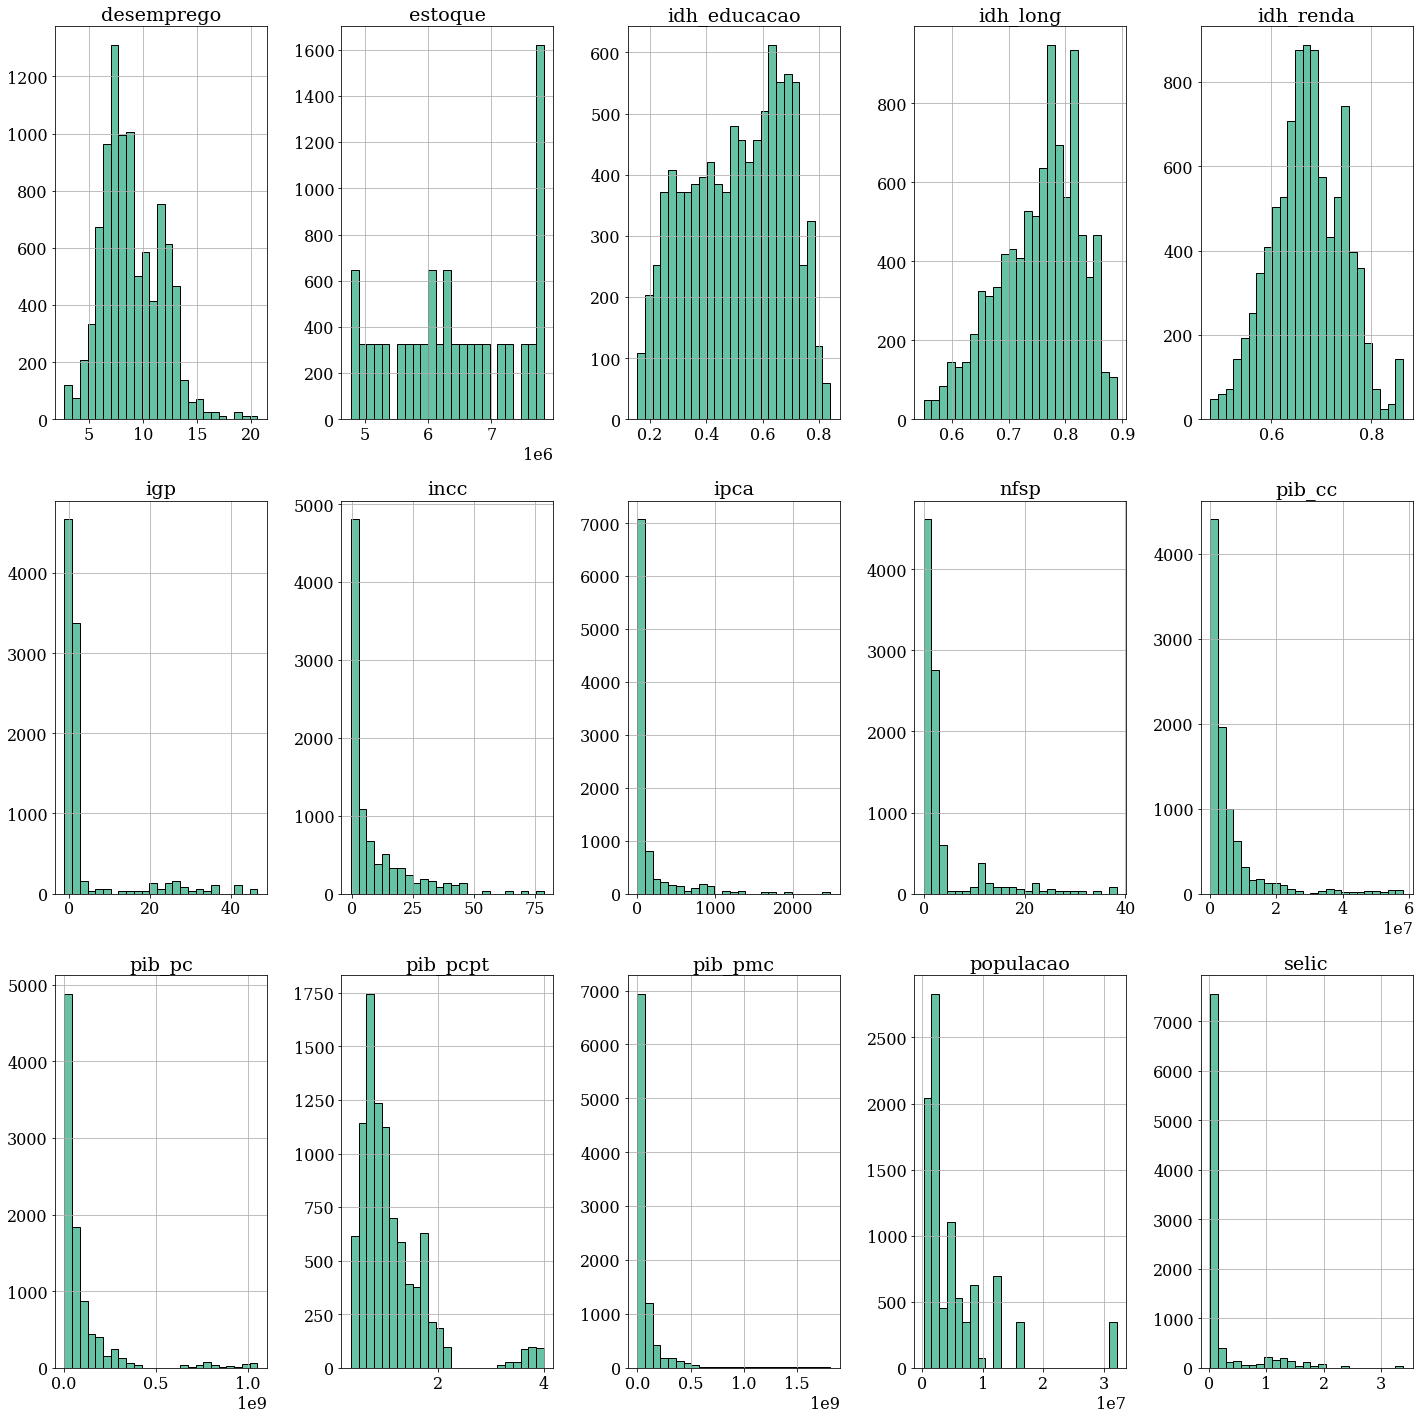

In [174]:
df_input.drop("data", axis=1).hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

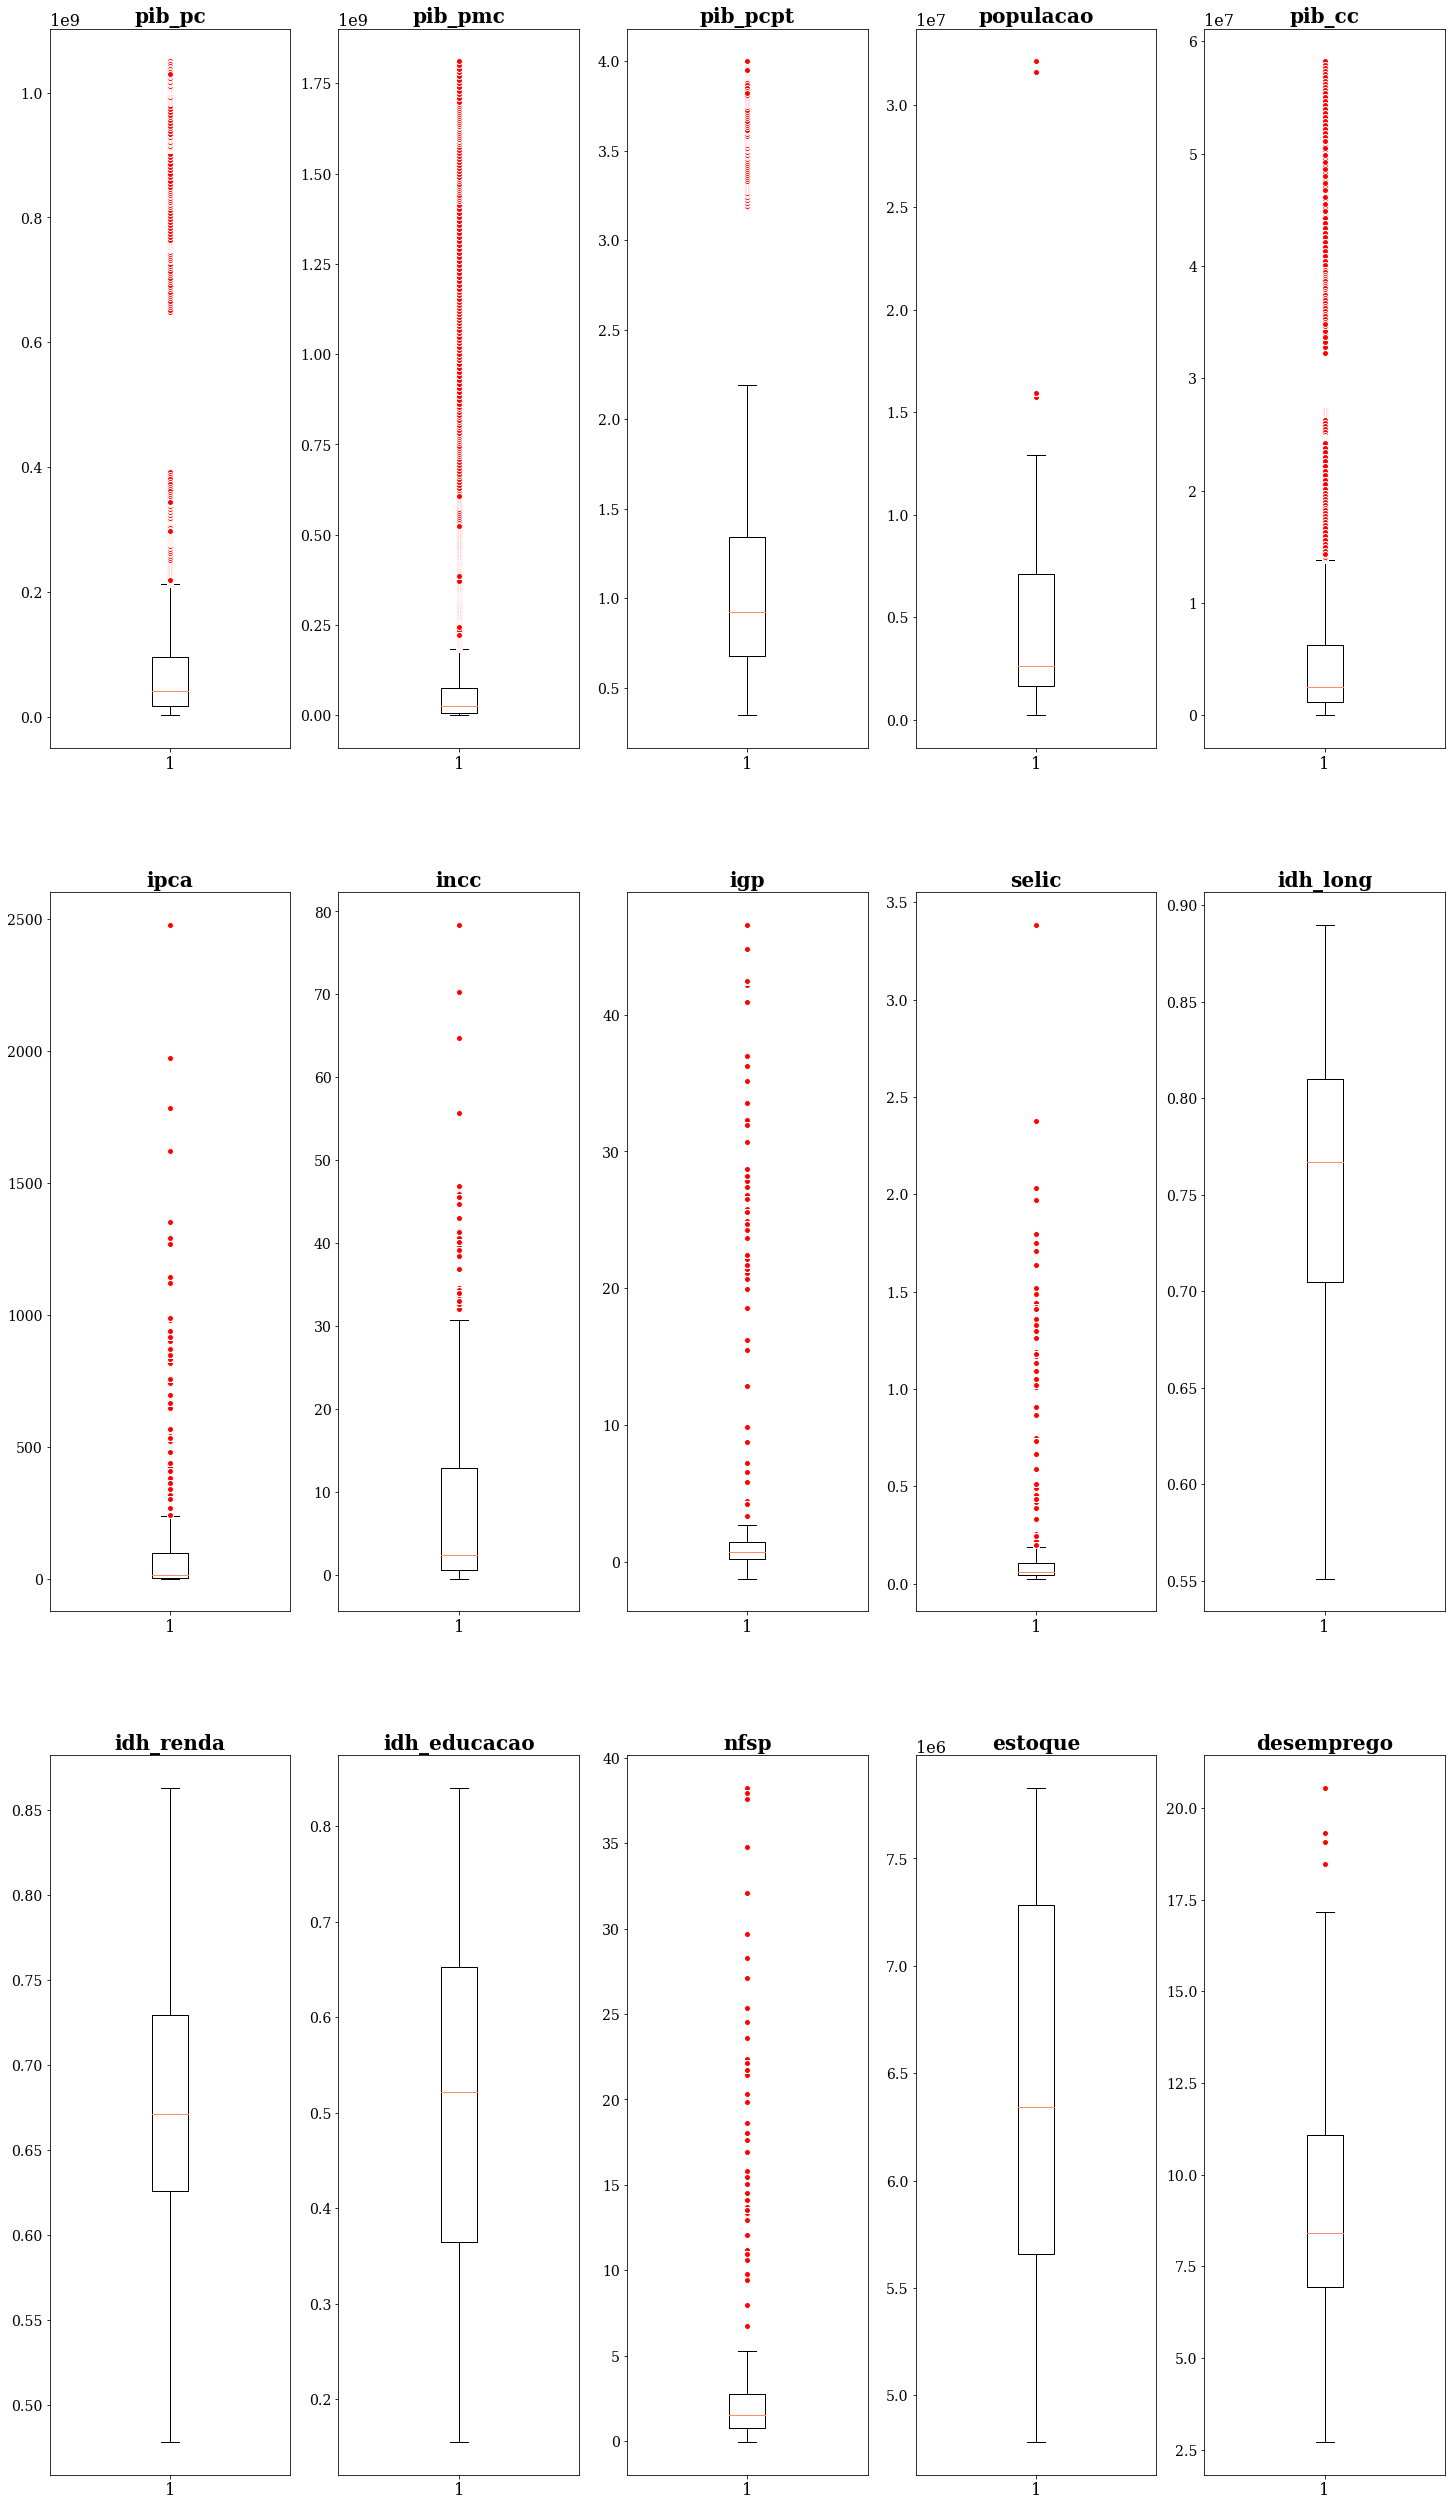

In [175]:
#Creating subplot of each column with its own scale
float64_columns = df_input.drop("data", axis=1).select_dtypes(include='float64').columns
df_float64_columns = df_input[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(3, 5, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

### 3.3. Feature Relationship

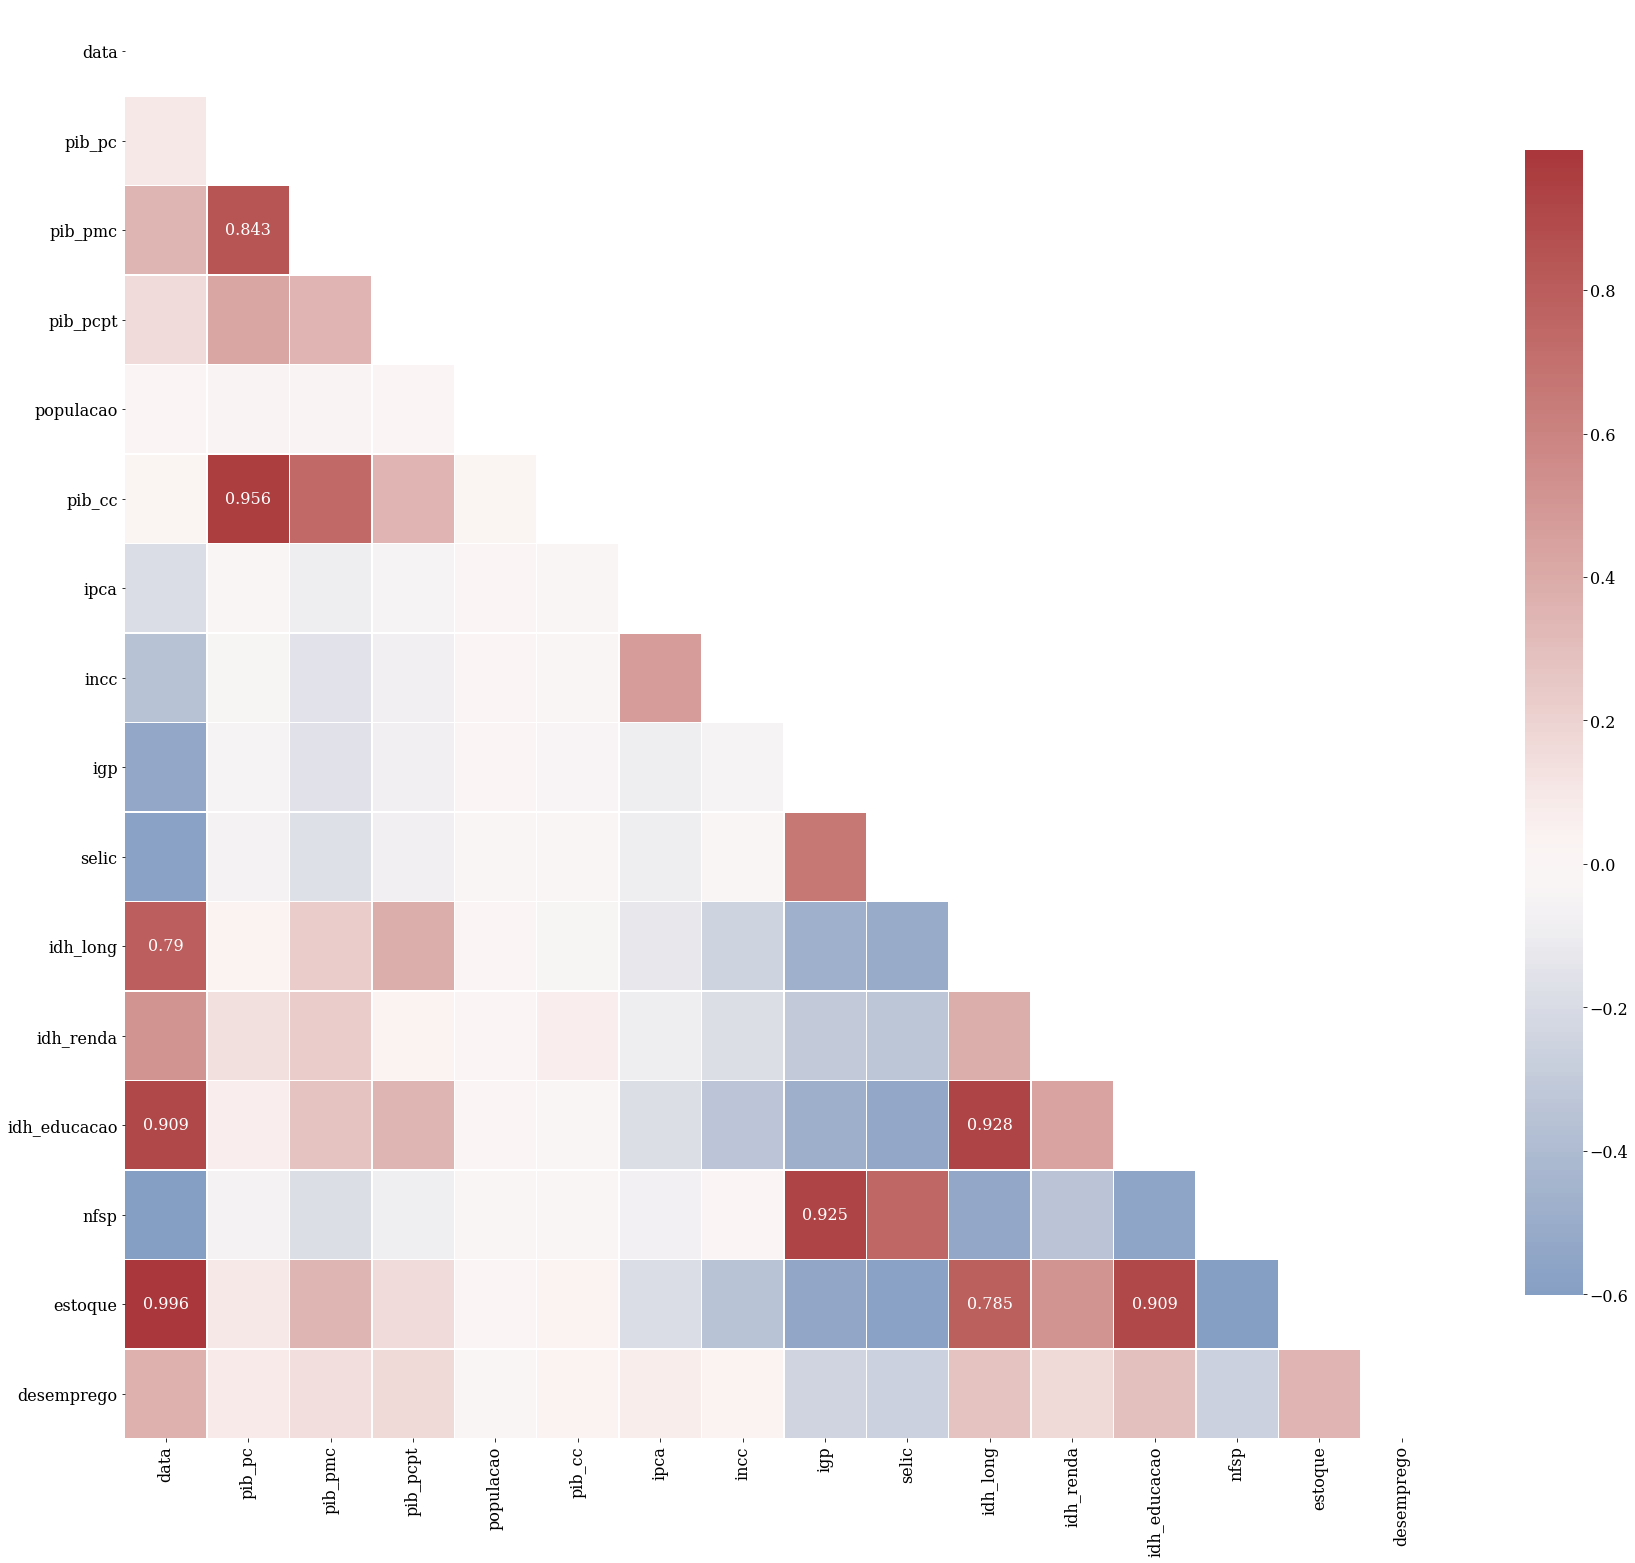

In [176]:
df_corr = df_input.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 3), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(25, 22))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [177]:
corr_matrix = df_input.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

data          estoque         0.995768
pib_pc        pib_cc          0.955945
idh_long      idh_educacao    0.927717
igp           nfsp            0.924957
data          idh_educacao    0.909420
idh_educacao  estoque         0.909110
pib_pc        pib_pmc         0.843445
data          idh_long        0.790454
idh_long      estoque         0.784846
selic         nfsp            0.749377
pib_pmc       pib_cc          0.734325
dtype: float64

## EDA - Target Variable

In [178]:
df_target.shape

(9396, 3)

In [179]:
df_target.head()

,data,estados,consumo
0,199101,AC,16951.0
1,199102,AL,308951.0
2,199103,AM,259396.0
3,199104,AP,25699.0
4,199105,BA,1166517.0


In [180]:
df_target.tail()

,data,estados,consumo
9391,201908,RS,2753564.0
9392,201909,SC,3258027.0
9393,201910,SE,409903.0
9394,201911,SP,10458276.0
9395,201912,TO,402932.0


In [181]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     9396 non-null   int64  
 1   estados  9396 non-null   object 
 2   consumo  9396 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 220.3+ KB


## 1. Structure Investigation

In [182]:
df_target.dtypes.value_counts()

object     1
int64      1
float64    1
dtype: int64

### 1.1 Structure of numerical features


In [183]:
df_target.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
data,9396.0,2.005065e+05,8.367117e+02,199101.0,199803.75,200506.5,201209.25,201912.0
consumo,9396.0,1.602487e+06,2.323538e+06,13487.0,347837.25,787618.0,1881884.39,15273135.0


In [184]:
df_target.data.nunique()

348

In [185]:
df_input.data.nunique()

348

In [186]:
set(df_input.data) - set(df_target.data)

set()

In [187]:
set(df_target.data) - set(df_input.data)

set()

In [33]:
data = df_target["data"]
estados = [column for column in df_target.columns if column != "data"]
datas = np.array([[d] * len(estados) for d in data]).flatten()
estados = np.array(estados * len(data))
df = pd.DataFrame({"data": datas, "estados": estados})
consumo = []

for i in range(df_target.shape[0]):
    consumo.append(df_target.drop("data", axis=1).T[i].values)
#consumo = np.array(consumo).reshape(-1, 1).squeeze()
#df["consumo"] = consumo

consumo = np.array(consumo).flatten()
df["consumo"] = consumo

In [34]:
df = df[~((df["data"] >= 199001) & (df["data"] <= 199012))].reset_index(drop=True)

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
data,9396.0,200506.500000,836.711674,199101.0,199803.75,200506.5,201209.25,201912.0
consumo,9396.0,218687.102883,633413.615568,0.0,31264.25,74281.0,200594.50,10886000.0


In [36]:
df

,data,estados,consumo
0,199101,AC,1841.0
1,199101,AL,23059.0
2,199101,AM,20044.0
3,199101,AP,2208.0
4,199101,BA,89134.0
...,...,...,...
9391,201912,RS,223214.0
9392,201912,SC,226233.0
9393,201912,SE,39732.0
9394,201912,SP,692232.0


In [155]:
df_input

,estados,data,pib_pc,pib_pmc,pib_pcpt,populacao,pib_cc,ipca,incc,igp,selic,idh_long,idh_renda,idh_educacao,nfsp,estoque,desemprego
0,AC,199101,3.281564e+06,1.466336e+01,0.708721,417102.0,1.869529e+05,6.62,4.70,19.93,2.375185,0.645,0.647,0.176,11.17,4.782147e+06,9.216314
1,AL,199101,1.419695e+07,7.480208e+01,0.510378,2512658.0,1.045711e+06,6.62,4.70,19.93,2.375185,0.552,0.574,0.174,11.17,4.782147e+06,8.980849
2,AM,199101,1.481369e+07,1.925417e+02,0.634686,2102766.0,1.727997e+06,6.62,4.70,19.93,2.375185,0.668,0.527,0.254,11.17,4.782147e+06,11.555730
3,AP,199101,2.553397e+06,1.704212e+01,0.793464,289035.0,7.302087e+04,6.62,4.70,19.93,2.375185,0.645,0.620,0.204,11.17,4.782147e+06,5.922940
4,BA,199101,6.417557e+07,4.757343e+02,0.488841,11867336.0,6.191147e+06,6.62,4.70,19.93,2.375185,0.582,0.605,0.182,11.17,4.782147e+06,8.211435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9391,RS,201912,2.191460e+08,3.851358e+08,1.751534,4614268.0,9.031052e+06,5.90,0.17,1.74,0.024620,0.780,0.700,0.770,0.49,7.827728e+06,11.100000
9392,SC,201912,1.397300e+08,2.455670e+08,1.778611,1515142.0,6.353526e+06,5.90,0.17,1.74,0.024620,0.870,0.710,0.780,0.49,7.827728e+06,11.100000
9393,SE,201912,2.079654e+07,3.654866e+07,0.822464,32126058.0,8.019597e+05,5.90,0.17,1.74,0.024620,0.850,0.780,0.830,0.49,7.827728e+06,11.100000
9394,SP,201912,1.030307e+09,1.810701e+09,2.039769,946604.0,3.482197e+07,5.90,0.17,1.74,0.024620,0.800,0.800,0.640,0.49,7.827728e+06,11.100000


In [151]:
#df = pd.merge(left=df_input, right=df, how="inner", on=["estados", "data"])

In [188]:
df = pd.merge(left=df_input, right=df_target, how="inner", on=["estados", "data"])

In [190]:
df.to_csv("input_and_output.csv", index=False)

In [40]:
# importamos as libs
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np
import tensorflow as tf
sns.set_palette("Set2")

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [41]:
# calcula metricas de regressao
def score_regression_metrics(y_test, y_test_pred):

    RMSE = mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=False)
    MAE = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
    MAPE = mean_absolute_percentage_error(y_true=y_test, y_pred=y_test_pred)
    R2 = r2_score(y_true=y_test, y_pred=y_test_pred)

    scores = {
        "neg_root_mean_squared_error": RMSE,
        "neg_mean_absolute_error": MAE,
        "neg_mean_absolute_percentage_error": MAPE,
    }

    return scores

def show_scores (scores):

    print ("Scores obtidos:")

    print (f"RMSE: {scores['neg_root_mean_squared_error']}")
    print (f"MAE: {scores['neg_mean_absolute_error']}")
    print (f"MAPE: {scores['neg_mean_absolute_percentage_error']}")

In [42]:
import numpy as np

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

# Regressão Linear

In [184]:
x = df.drop(["data", "consumo"], axis=1).copy()

# processo de one-hot
x = pd.get_dummies(data=x, columns=["estados"], drop_first=True)

# aqui só precisamos do valor do consumo em si 
y = df[["consumo"]].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)

In [186]:
regr = LinearRegression()

regr.fit(x_train, y_train)

print(f"Score: {regr.score(x_test, y_test)}")

Score: -1.1569415977866764


In [187]:
y_pred = regr.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 266825.7075820698
MAE: 186120.4988159231
MAPE: 3.253415989133176


In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)

# calcula media e desvio padrao do treino e normaliza os dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

regr = LinearRegression()

regr.fit(x_train, y_train)

print(f"Score: {regr.score(x_test, y_test)}")

Score: -1.1569417127675736


In [ ]:
y_pred = regr.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

In [189]:
y_pred = regr.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 266825.7146939589
MAE: 186120.5032678172
MAPE: 3.2534160425003633


# LSTM

In [197]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=32, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [49]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = StandardScaler()

    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [47]:
batch_size = 32
epochs = 200
verbose = 1
timesteps = 3

In [199]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose)

Epoch 1/200
250/250 [==============================] - 2s 2ms/step - loss: 16406385000448.0000 - RMSE: 4050479.5000
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 1744250732544.0000 - RMSE: 1320700.8750
Epoch 3/200
250/250 [==============================] - 1s 4ms/step - loss: 717251084288.0000 - RMSE: 846906.7500
Epoch 4/200
250/250 [==============================] - 1s 4ms/step - loss: 532471218176.0000 - RMSE: 729706.2500
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 488586215424.0000 - RMSE: 698989.4375
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 452367220736.0000 - RMSE: 672582.5000
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 440399101952.0000 - RMSE: 663625.7500
Epoch 8/200
250/250 [==============================] - 1s 3ms/step - loss: 444456042496.0000 - RMSE: 666675.3750
Epoch 9/200
250/250 [==============================] - 1s 3ms/step - loss: 433408638976.000

In [ ]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

In [203]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 4703458.973720188
MAE: 2276755.640386725
MAPE: 51.85350097382274


In [204]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose)

Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 518299648000.0000 - RMSE: 719930.3125
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 515007643648.0000 - RMSE: 717640.3125
Epoch 3/200
250/250 [==============================] - 1s 2ms/step - loss: 494839267328.0000 - RMSE: 703448.1250
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 471161372672.0000 - RMSE: 686411.9375
Epoch 5/200
250/250 [==============================] - 0s 2ms/step - loss: 458481238016.0000 - RMSE: 677112.4375
Epoch 6/200
250/250 [==============================] - 0s 2ms/step - loss: 451307634688.0000 - RMSE: 671794.3125
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 445492363264.0000 - RMSE: 667452.1250
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 440831475712.0000 - RMSE: 663951.4375
Epoch 9/200
250/250 [==============================] - 0s 2ms/step - loss: 438102392832.0000 - R

In [205]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 160445.9830269548
MAE: 94393.46474511179
MAPE: 5388595512531861.0


In [206]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 196531.40140166777
MAE: 128040.59979233168
MAPE: 1.066225065367996


In [213]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=128, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [214]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose)

Epoch 1/200
250/250 [==============================] - 2s 5ms/step - loss: 487757479936.0000 - RMSE: 698396.3750
Epoch 2/200
250/250 [==============================] - 2s 6ms/step - loss: 433805033472.0000 - RMSE: 658638.7500
Epoch 3/200
250/250 [==============================] - 1s 5ms/step - loss: 414856839168.0000 - RMSE: 644093.8125
Epoch 4/200
250/250 [==============================] - 1s 6ms/step - loss: 398286422016.0000 - RMSE: 631099.3750
Epoch 5/200
250/250 [==============================] - 1s 6ms/step - loss: 370402885632.0000 - RMSE: 608607.3125
Epoch 6/200
250/250 [==============================] - 1s 5ms/step - loss: 333539311616.0000 - RMSE: 577528.6250
Epoch 7/200
250/250 [==============================] - 2s 6ms/step - loss: 286741463040.0000 - RMSE: 535482.4375
Epoch 8/200
250/250 [==============================] - 1s 6ms/step - loss: 245427355648.0000 - RMSE: 495406.2500
Epoch 9/200
250/250 [==============================] - 2s 6ms/step - loss: 207852929024.0000 - R

In [215]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 39187.481691299436
MAE: 20525.30182699046
MAPE: 3.3910034531665676e+16


In [216]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 77025.83137902929
MAE: 46081.06404137578
MAPE: 0.6194038182698439


In [217]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=500, verbose=verbose)

Epoch 1/500
250/250 [==============================] - 2s 6ms/step - loss: 489790275584.0000 - RMSE: 699850.1875
Epoch 2/500
250/250 [==============================] - 1s 5ms/step - loss: 436306313216.0000 - RMSE: 660534.8750
Epoch 3/500
250/250 [==============================] - 2s 6ms/step - loss: 419660464128.0000 - RMSE: 647812.0625
Epoch 4/500
250/250 [==============================] - 2s 6ms/step - loss: 408959975424.0000 - RMSE: 639499.8125
Epoch 5/500
250/250 [==============================] - 1s 5ms/step - loss: 392973582336.0000 - RMSE: 626876.0625
Epoch 6/500
250/250 [==============================] - 1s 6ms/step - loss: 377813467136.0000 - RMSE: 614665.3125
Epoch 7/500
250/250 [==============================] - 1s 6ms/step - loss: 354480586752.0000 - RMSE: 595382.7500
Epoch 8/500
250/250 [==============================] - 1s 5ms/step - loss: 328297971712.0000 - RMSE: 572972.9375
Epoch 9/500
250/250 [==============================] - 1s 5ms/step - loss: 302379630592.0000 - R

In [218]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 27444.06026052622
MAE: 14565.83703824177
MAPE: 1.6945379875649548e+16


In [219]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 85205.9171621067
MAE: 58804.423891151375
MAPE: 0.9006612572314762


In [220]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=128, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [221]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=200, verbose=verbose)

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 518333267968.0000 - RMSE: 719953.6875
Epoch 2/200
250/250 [==============================] - 1s 5ms/step - loss: 518197116928.0000 - RMSE: 719859.1250
Epoch 3/200
250/250 [==============================] - 1s 5ms/step - loss: 513545338880.0000 - RMSE: 716620.7500
Epoch 4/200
250/250 [==============================] - 1s 4ms/step - loss: 492222054400.0000 - RMSE: 701585.3750
Epoch 5/200
250/250 [==============================] - 1s 5ms/step - loss: 473145573376.0000 - RMSE: 687855.7500
Epoch 6/200
250/250 [==============================] - 1s 5ms/step - loss: 463166308352.0000 - RMSE: 680563.2500
Epoch 7/200
250/250 [==============================] - 1s 5ms/step - loss: 456254128128.0000 - RMSE: 675465.8750
Epoch 8/200
250/250 [==============================] - 1s 3ms/step - loss: 450742845440.0000 - RMSE: 671373.8750
Epoch 9/200
250/250 [==============================] - 1s 3ms/step - loss: 446972133376.0000 - R

In [222]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 173591.08491016354
MAE: 105235.64959673437
MAPE: 8.922061611803074e+16


In [223]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 209907.96232000104
MAE: 133273.3570319426
MAPE: 1.2125902418427619


In [224]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=500, verbose=verbose)

Epoch 1/500
250/250 [==============================] - 2s 5ms/step - loss: 518333169664.0000 - RMSE: 719953.5625
Epoch 2/500
250/250 [==============================] - 1s 6ms/step - loss: 518178013184.0000 - RMSE: 719845.8125
Epoch 3/500
250/250 [==============================] - 2s 7ms/step - loss: 513004699648.0000 - RMSE: 716243.4375
Epoch 4/500
250/250 [==============================] - 2s 7ms/step - loss: 489600188416.0000 - RMSE: 699714.3750
Epoch 5/500
250/250 [==============================] - 1s 5ms/step - loss: 468697939968.0000 - RMSE: 684615.1875
Epoch 6/500
250/250 [==============================] - 1s 6ms/step - loss: 458670112768.0000 - RMSE: 677251.8750
Epoch 7/500
250/250 [==============================] - 1s 5ms/step - loss: 452047601664.0000 - RMSE: 672344.8750
Epoch 8/500
250/250 [==============================] - 1s 6ms/step - loss: 446981242880.0000 - RMSE: 668566.5625
Epoch 9/500
250/250 [==============================] - 2s 6ms/step - loss: 443545485312.0000 - R

In [225]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 54140.277435541015
MAE: 36542.333513401805
MAPE: 1.4856954434528378e+17


In [226]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 173818.91460540035
MAE: 94696.61034532913
MAPE: 0.9633608166949036


In [227]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [228]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=verbose)

Epoch 1/200
63/63 [==============================] - 2s 17ms/step - loss: 518333530112.0000 - RMSE: 719953.8125
Epoch 2/200
63/63 [==============================] - 1s 17ms/step - loss: 518333104128.0000 - RMSE: 719953.5625
Epoch 3/200
63/63 [==============================] - 1s 17ms/step - loss: 518324846592.0000 - RMSE: 719947.8125
Epoch 4/200
63/63 [==============================] - 1s 15ms/step - loss: 518156713984.0000 - RMSE: 719831.0625
Epoch 5/200
63/63 [==============================] - 1s 19ms/step - loss: 516631003136.0000 - RMSE: 718770.5000
Epoch 6/200
63/63 [==============================] - 1s 16ms/step - loss: 508780478464.0000 - RMSE: 713288.5000
Epoch 7/200
63/63 [==============================] - 1s 16ms/step - loss: 489059614720.0000 - RMSE: 699328.0000
Epoch 8/200
63/63 [==============================] - 1s 16ms/step - loss: 471367450624.0000 - RMSE: 686562.0625
Epoch 9/200
63/63 [==============================] - 1s 15ms/step - loss: 462229864448.0000 - RMSE: 6798

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

In [ ]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

In [51]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [52]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose)

Epoch 1/200
125/125 [==============================] - 3s 10ms/step - loss: 468517486592.0000 - RMSE: 684483.3750
Epoch 2/200
125/125 [==============================] - 2s 12ms/step - loss: 408049680384.0000 - RMSE: 638787.6875
Epoch 3/200
125/125 [==============================] - 1s 12ms/step - loss: 318980030464.0000 - RMSE: 564783.1875
Epoch 4/200
125/125 [==============================] - 1s 10ms/step - loss: 221313024000.0000 - RMSE: 470439.1875
Epoch 5/200
125/125 [==============================] - 2s 12ms/step - loss: 172701122560.0000 - RMSE: 415573.2500
Epoch 6/200
125/125 [==============================] - 1s 11ms/step - loss: 175329771520.0000 - RMSE: 418723.9688
Epoch 7/200
125/125 [==============================] - 2s 12ms/step - loss: 186418315264.0000 - RMSE: 431761.8750
Epoch 8/200
125/125 [==============================] - 1s 10ms/step - loss: 119967948800.0000 - RMSE: 346363.9062
Epoch 9/200
125/125 [==============================] - 2s 12ms/step - loss: 42101235712.

In [ ]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

In [ ]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

In [53]:
from sklearn.preprocessing import RobustScaler

In [55]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = RobustScaler()

    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [56]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [57]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose)

Epoch 1/200
125/125 [==============================] - 2s 12ms/step - loss: 498775162880.0000 - RMSE: 706240.1875
Epoch 2/200
125/125 [==============================] - 1s 11ms/step - loss: 456445165568.0000 - RMSE: 675607.2500
Epoch 3/200
125/125 [==============================] - 1s 11ms/step - loss: 423362199552.0000 - RMSE: 650662.8750
Epoch 4/200
125/125 [==============================] - 1s 10ms/step - loss: 394937270272.0000 - RMSE: 628440.3750
Epoch 5/200
125/125 [==============================] - 2s 12ms/step - loss: 355081945088.0000 - RMSE: 595887.5000
Epoch 6/200
125/125 [==============================] - 2s 14ms/step - loss: 300916473856.0000 - RMSE: 548558.5625
Epoch 7/200
125/125 [==============================] - 1s 11ms/step - loss: 254781980672.0000 - RMSE: 504759.3438
Epoch 8/200
125/125 [==============================] - 2s 12ms/step - loss: 180839153664.0000 - RMSE: 425251.8750
Epoch 9/200
125/125 [==============================] - 1s 12ms/step - loss: 119757127680

In [58]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 64707.991463957966
MAE: 26030.49104563693
MAPE: 2.3933374501442464e+16


In [59]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 93546.34690321288
MAE: 58374.1110490082
MAPE: 0.765282810880378


In [ ]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [66]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='RMSE', factor=0.1, patience=5)

model.fit(x_train, y_train, batch_size=64, epochs=300, verbose=verbose, callbacks=[rlrop])

Epoch 1/300
125/125 [==============================] - 2s 9ms/step - loss: 504590860288.0000 - RMSE: 710345.5625
Epoch 2/300
125/125 [==============================] - 1s 12ms/step - loss: 448219742208.0000 - RMSE: 669492.1250
Epoch 3/300
125/125 [==============================] - 2s 12ms/step - loss: 411076952064.0000 - RMSE: 641152.8125
Epoch 4/300
125/125 [==============================] - 1s 10ms/step - loss: 367788883968.0000 - RMSE: 606456.0000
Epoch 5/300
125/125 [==============================] - 1s 10ms/step - loss: 319203639296.0000 - RMSE: 564981.1250
Epoch 6/300
125/125 [==============================] - 2s 12ms/step - loss: 281854410752.0000 - RMSE: 530899.6250
Epoch 7/300
125/125 [==============================] - 2s 12ms/step - loss: 245528100864.0000 - RMSE: 495507.9375
Epoch 8/300
125/125 [==============================] - 1s 12ms/step - loss: 201638199296.0000 - RMSE: 449041.4375
Epoch 9/300
125/125 [==============================] - 1s 9ms/step - loss: 160944979968.0

In [67]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 64743.64517874937
MAE: 39225.6320961278
MAPE: 1.2366986520657118e+17


In [68]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 66886.09963027056
MAE: 49132.21985677083
MAPE: 1.039925971916201


In [69]:
from sklearn.preprocessing import QuantileTransformer

In [70]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = QuantileTransformer(output_distribution='normal', random_state=0)


    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [75]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [76]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='RMSE', factor=0.1, patience=5)

model.fit(x_train, y_train, batch_size=64, epochs=300, verbose=verbose, callbacks=[rlrop])

Epoch 1/300
125/125 [==============================] - 2s 9ms/step - loss: 443173994496.0000 - RMSE: 665713.1250
Epoch 2/300
125/125 [==============================] - 2s 12ms/step - loss: 348883812352.0000 - RMSE: 590663.8750
Epoch 3/300
125/125 [==============================] - 1s 12ms/step - loss: 254922113024.0000 - RMSE: 504898.1250
Epoch 4/300
125/125 [==============================] - 1s 12ms/step - loss: 121243836416.0000 - RMSE: 348200.8438
Epoch 5/300
125/125 [==============================] - 2s 12ms/step - loss: 161611792384.0000 - RMSE: 402009.6875
Epoch 6/300
125/125 [==============================] - 1s 10ms/step - loss: 110485741568.0000 - RMSE: 332393.9688
Epoch 7/300
125/125 [==============================] - 2s 12ms/step - loss: 68257914880.0000 - RMSE: 261262.1562
Epoch 8/300
125/125 [==============================] - 1s 10ms/step - loss: 75413577728.0000 - RMSE: 274615.3125
Epoch 9/300
125/125 [==============================] - 2s 12ms/step - loss: 53424640000.000

In [77]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 34085.65535625817
MAE: 19137.258366263868
MAPE: 1.7557143724712444e+16


In [78]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 123324.69810182358
MAE: 79233.63779089096
MAPE: 1.2987834079889715


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = MinMaxScaler()


    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [85]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [81]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='RMSE', factor=0.1, patience=5)

model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose, callbacks=[rlrop])

Epoch 1/200
125/125 [==============================] - 2s 10ms/step - loss: 466608816128.0000 - RMSE: 683087.6875
Epoch 2/200
125/125 [==============================] - 1s 11ms/step - loss: 444717498368.0000 - RMSE: 666871.4375
Epoch 3/200
125/125 [==============================] - 1s 12ms/step - loss: 458577608704.0000 - RMSE: 677183.5625
Epoch 4/200
125/125 [==============================] - 2s 13ms/step - loss: 433245552640.0000 - RMSE: 658213.9375
Epoch 5/200
125/125 [==============================] - 2s 13ms/step - loss: 417569538048.0000 - RMSE: 646196.1875
Epoch 6/200
125/125 [==============================] - 2s 12ms/step - loss: 435274874880.0000 - RMSE: 659753.6250
Epoch 7/200
125/125 [==============================] - 2s 12ms/step - loss: 425260220416.0000 - RMSE: 652119.8125
Epoch 8/200
125/125 [==============================] - 1s 11ms/step - loss: 399498117120.0000 - RMSE: 632058.6250
Epoch 9/200
125/125 [==============================] - 2s 12ms/step - loss: 375993958400

In [82]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 159133.20183126934
MAE: 85246.44102321219
MAPE: 2.0119105922014973e+17


In [83]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 121178.10205222326
MAE: 69515.43058856938
MAPE: 0.8493857459397844


In [100]:
from sklearn.preprocessing import FunctionTransformer

In [104]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = FunctionTransformer(np.log, validate=True)

    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [105]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [106]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='RMSE', factor=0.1, patience=5)

model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose, callbacks=[rlrop])

Epoch 1/200
125/125 [==============================] - 2s 9ms/step - loss: nan - RMSE: nan
Epoch 2/200
125/125 [==============================] - 1s 10ms/step - loss: nan - RMSE: nan
Epoch 3/200
 33/125 [======>.......................] - ETA: 1s - loss: nan - RMSE: nan

KeyboardInterrupt: 

In [94]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 413099.29308280675
MAE: 194490.21534708748
MAPE: 4.3100869800600435e+17


In [95]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 191799.72565559295
MAE: 114477.07738530585
MAPE: 1.359915857160814


In [96]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()

model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose)

Epoch 1/200
125/125 [==============================] - 2s 11ms/step - loss: 498787221504.0000 - RMSE: 706248.6875
Epoch 2/200
125/125 [==============================] - 2s 12ms/step - loss: 460122030080.0000 - RMSE: 678322.9375
Epoch 3/200
125/125 [==============================] - 1s 11ms/step - loss: 454143082496.0000 - RMSE: 673901.3750
Epoch 4/200
125/125 [==============================] - 1s 11ms/step - loss: 448859865088.0000 - RMSE: 669970.0625
Epoch 5/200
125/125 [==============================] - 1s 11ms/step - loss: 447143706624.0000 - RMSE: 668688.0625
Epoch 6/200
125/125 [==============================] - 2s 13ms/step - loss: 443137654784.0000 - RMSE: 665685.8750
Epoch 7/200
125/125 [==============================] - 1s 11ms/step - loss: 440872828928.0000 - RMSE: 663982.5625
Epoch 8/200
125/125 [==============================] - 1s 11ms/step - loss: 438405562368.0000 - RMSE: 662122.0000
Epoch 9/200
125/125 [==============================] - 1s 11ms/step - loss: 436053606400

In [97]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 82599.15042901639
MAE: 46224.362099639715
MAPE: 1.0627194237488314e+17


In [98]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 86787.23660850871
MAE: 58775.426530640514
MAPE: 1.2004367130134526


In [99]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = StandardScaler()


    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new